In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=sns.load_dataset('taxis')



In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [4]:
df.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      Manhattan       Manhattan  
2           West Village      Manhattan       Manhattan  
3         Yorkville West      Manhattan       Manhattan  
4         Yorkville West      Manhattan       Manhattan

In [5]:
df.describe()

pickup                        dropoff  \
count                           6433                           6433   
mean   2019-03-16 08:31:28.514223616  2019-03-16 08:45:49.491217408   
min              2019-02-28 23:29:03            2019-02-28 23:32:35   
25%              2019-03-08 15:50:34            2019-03-08 16:12:51   
50%              2019-03-15 21:46:58            2019-03-15 22:06:44   
75%              2019-03-23 17:41:38            2019-03-23 17:51:56   
max              2019-03-31 23:43:45            2019-04-01 00:13:58   
std                              NaN                            NaN   

        passengers     distance         fare         tip        tolls  \
count  6433.000000  6433.000000  6433.000000  6433.00000  6433.000000   
mean      1.539251     3.024617    13.091073     1.97922     0.325273   
min       0.000000     0.000000     1.000000     0.00000     0.000000   
25%       1.000000     0.980000     6.500000     0.00000     0.000000   
50%       1.000000     1.640000     9.500000     1.70000     0.000000   
75%       2.000000     3.210000    15.000000     2.80000     0.000000   
max       6.000000    36.700000   150.000000    33.20000    24.020000   
std       1.203768     3.827867    11.551804     2.44856     1.415267   

             total  
count  6433.000000  
mean     18.517794  
min       1.300000  
25%      10.800000  
50%      14.160000  
75%      20.300000  
max     174.820000  
std      13.815570

In [6]:
df.describe(include='object')

color      payment     pickup_zone           dropoff_zone  \
count     6433         6389            6407                   6388   
unique       2            2             194                    203   
top     yellow  credit card  Midtown Center  Upper East Side North   
freq      5451         4577             230                    245   

       pickup_borough dropoff_borough  
count            6407            6388  
unique              4               5  
top         Manhattan       Manhattan  
freq             5268            5206

In [7]:
df.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [8]:
(df.isna().sum()/df.shape[0])*100

pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64

In [9]:
df.dropna(inplace=True)

In [10]:
df.reset_index(drop=True,inplace=True)

In [11]:
df.isnull().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

# EDA

In [12]:
# tip is numerical col analyze it with color column which is categorical
df.color.value_counts()

color
yellow    5373
green      968
Name: count, dtype: int64

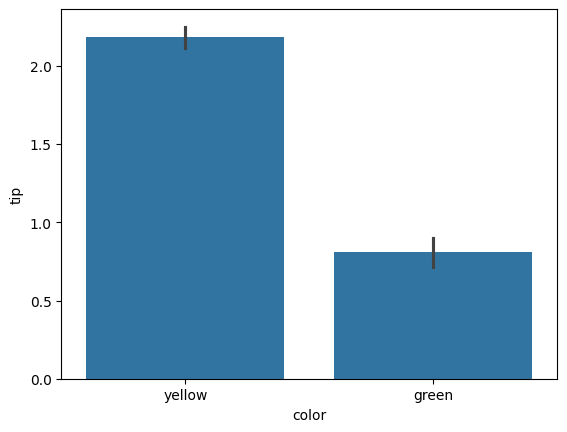

In [13]:
sns.barplot(x='color',y='tip',data=df,estimator=np.mean)
plt.show()

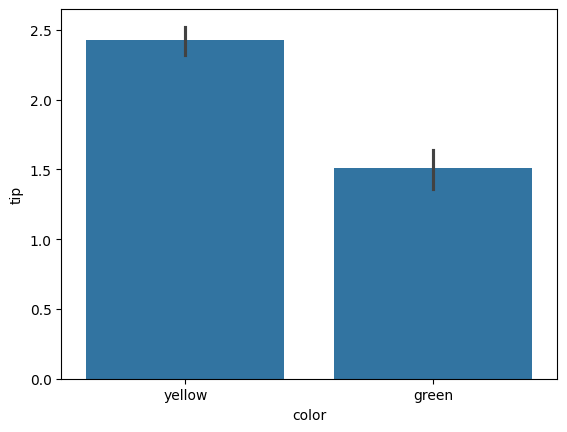

In [14]:
sns.barplot(x='color',y='tip',data=df,estimator=np.std)
plt.show()

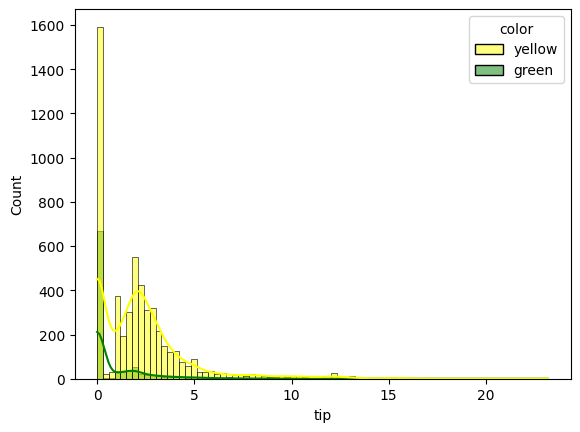

In [15]:
sns.histplot(data=df,x='tip',hue='color',kde=True,palette=['yellow','green'])
plt.show()

# Hypothesis:

**H0: Distribution of tip for yellow = Distribution of tip for green**

**H1: Distribution of tip for yellow ≠ Distribution of tip for green**

In [16]:
# Independent T-Test
yellow_tips = df[df['color']=='yellow']['tip']
green_tips = df[df['color']=='green']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(yellow_tips, green_tips)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tips differ by Color")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Color")

Independent T-Test statistic: 17.05932566128597
P-value: 7.791088119489453e-64
Reject null hypothesis: Tips differ by Color


# Using Payment as Categorical

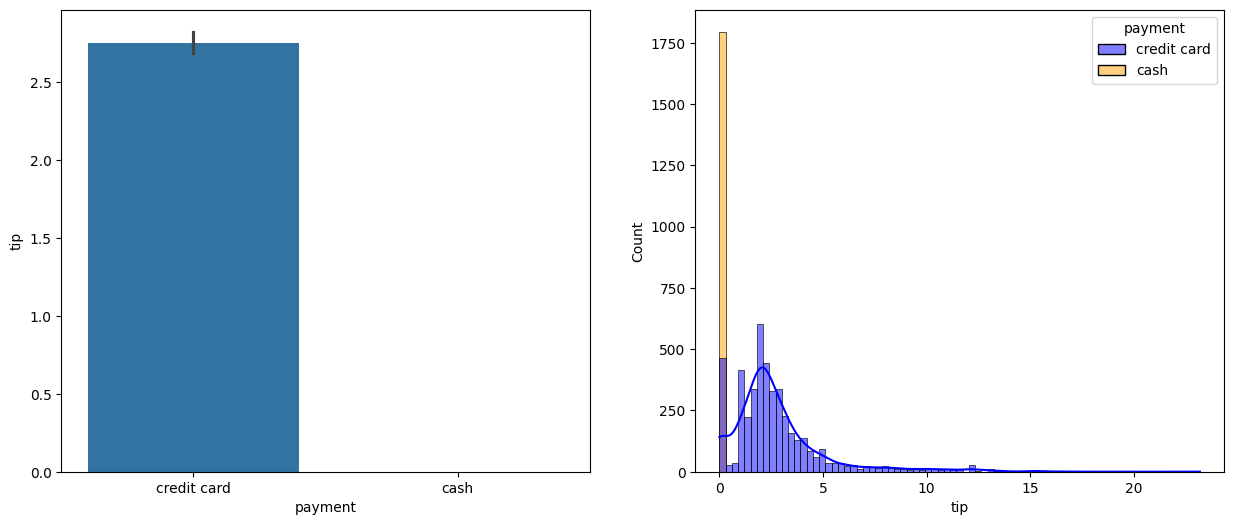

Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: Tips differ by Payment Method


In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x='payment',y='tip',data=df,estimator=np.mean)
plt.subplot(1,2,2)
sns.histplot(data=df,x='tip',hue='payment',kde=True,palette=['blue','orange'])
plt.show()
# Independent T-Test
credit_card = df[df['payment']=='credit card']['tip']
cash = df[df['payment']=='cash']['tip']
from scipy import stats
t_stat, p_val = stats.ttest_ind(credit_card, cash)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tips differ by Payment Method")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Payment Method")

# Hypothesis:

**H0: Distribution of tip for credit card = Distribution of tip for cash**

**H1: Distribution of tip for credit card ≠ Distribution of tip for cash**

In [18]:
# Insights:
# 1. There is a significant difference in tip amounts based on the payment method used, with credit card payments generally resulting in higher tips compared to cash payments.


In [19]:
df['pickup_borough'].value_counts()

pickup_borough
Manhattan    5226
Queens        638
Brooklyn      378
Bronx          99
Name: count, dtype: int64

C:\Users\CVR\AppData\Local\Temp\ipykernel_8260\3170756784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='pickup_borough',palette='Set2')


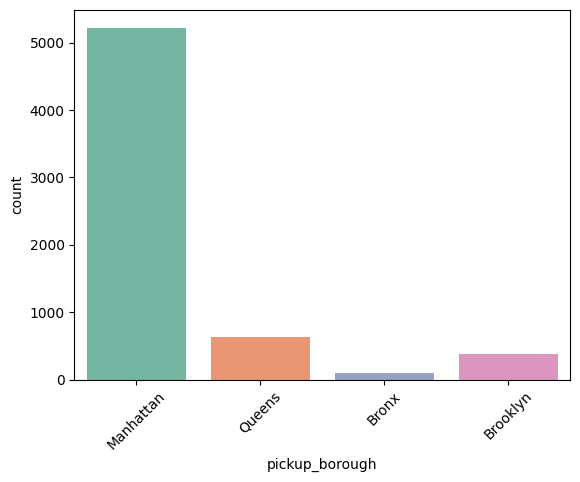

In [20]:
sns.countplot(data=df,x='pickup_borough',palette='Set2')
plt.xticks(rotation=45)
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_8260\2790407771.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_borough',y='tip',data=df,estimator=np.mean,palette='Set3')


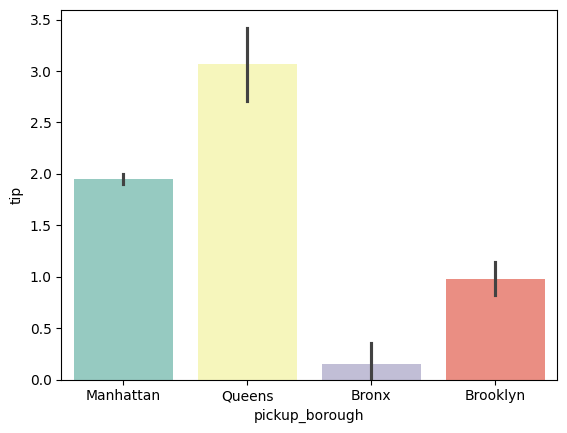

In [21]:
sns.barplot(x='pickup_borough',y='tip',data=df,estimator=np.mean,palette='Set3')
plt.show()

In [22]:
df['tip'].groupby(df['pickup_borough']).mean()

pickup_borough
Bronx        0.148586
Brooklyn     0.979127
Manhattan    1.945597
Queens       3.066458
Name: tip, dtype: float64

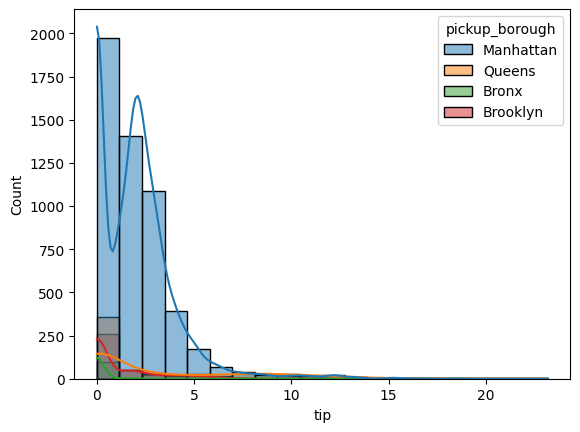

In [23]:
sns.histplot(data=df,x='tip',hue='pickup_borough',kde=True,bins=20)
plt.show()

# Hypotheses:

**H0: distribution of tip is same across all pickup_borough categories**

**H1: At least one category has a different distribution of tip**

In [24]:
# ANOVA Test
#regions = [group['Spending_Score'].values for name, group in df.groupby('pickup_borough')]
manhattan_tips = df[df['pickup_borough']=='Manhattan']['tip']
brooklyn_tips = df[df['pickup_borough']=='Brooklyn']['tip']
queens_tips = df[df['pickup_borough']=='Queens']['tip']
bronx_tips = df[df['pickup_borough']=='Bronx']['tip']
f_stat, p_val = stats.f_oneway(manhattan_tips, brooklyn_tips, queens_tips, bronx_tips)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by Pickup borough")
else:
    print("Fail to reject null hypothesis: No significant difference by Pickup borough")



ANOVA F-statistic: 91.57933831850565
P-value: 5.155109332422435e-58
Reject null hypothesis: tip differs by Pickup borough


In [25]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_borough, alpha=0.05)
print(tukey_result)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.1595 1.5015   True
    Bronx Manhattan    1.797   0.0  1.194    2.4   True
    Bronx    Queens   2.9179   0.0 2.2759 3.5599   True
 Brooklyn Manhattan   0.9665   0.0 0.6499  1.283   True
 Brooklyn    Queens   2.0873   0.0 1.7016 2.4731   True
Manhattan    Queens   1.1209   0.0 0.8716 1.3701   True
-------------------------------------------------------


# Using dropoff_borough

In [26]:
df['dropoff_borough'].value_counts()

dropoff_borough
Manhattan        5172
Queens            534
Brooklyn          497
Bronx             136
Staten Island       2
Name: count, dtype: int64

C:\Users\CVR\AppData\Local\Temp\ipykernel_8260\3651389869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='dropoff_borough',palette='Set2')


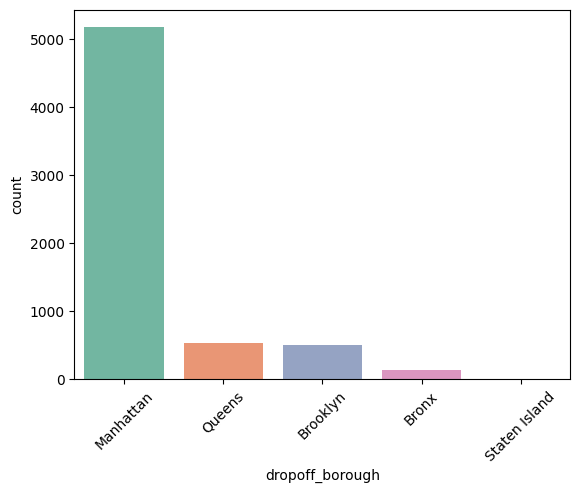

In [27]:
sns.countplot(data=df,x='dropoff_borough',palette='Set2')
plt.xticks(rotation=45)
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_8260\3226171074.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dropoff_borough',y='tip',data=df,estimator=np.mean,palette='Set3')


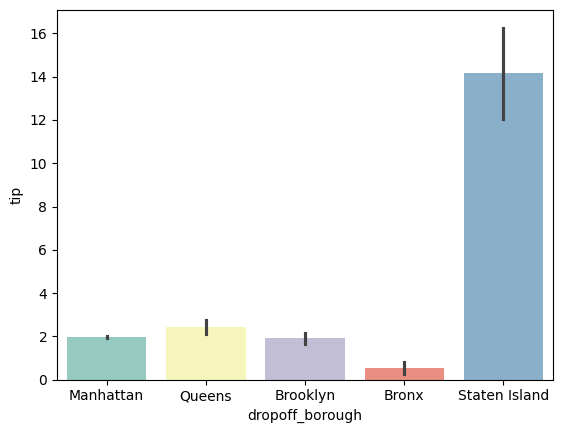

In [28]:
sns.barplot(x='dropoff_borough',y='tip',data=df,estimator=np.mean,palette='Set3')
plt.show()

In [29]:
df['tip'].groupby(df['dropoff_borough']).mean()

dropoff_borough
Bronx             0.534706
Brooklyn          1.921590
Manhattan         1.964321
Queens            2.422022
Staten Island    14.165000
Name: tip, dtype: float64

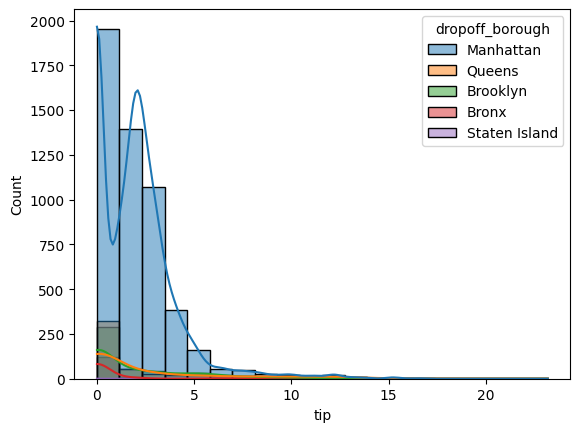

In [30]:
sns.histplot(data=df,x='tip',hue='dropoff_borough',kde=True,bins=20)
plt.show()

# Hypotheses:

**H0: distribution of tip is same across all dropoff_borough categories**

**H1: At least one category has a different distribution of tip**

In [31]:
# ANOVA Test
#regions = [group['Spending_Score'].values for name, group in df.groupby('pickup_borough')]
manhattan_tips = df[df['dropoff_borough']=='Manhattan']['tip']
brooklyn_tips = df[df['dropoff_borough']=='Brooklyn']['tip']
queens_tips = df[df['dropoff_borough']=='Queens']['tip']
bronx_tips = df[df['dropoff_borough']=='Bronx']['tip']
staten_island_tips = df[df['dropoff_borough']=='Staten Island']['tip']
f_stat, p_val = stats.f_oneway(manhattan_tips, brooklyn_tips, queens_tips, bronx_tips, staten_island_tips)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by dropoff borough")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff borough")


ANOVA F-statistic: 31.424177966968287
P-value: 5.87859571331583e-26
Reject null hypothesis: tip differs by dropoff borough


In [32]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.dropoff_borough, alpha=0.05)
print(tukey_result)


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  0.7691  2.0046   True
    Bronx     Manhattan   1.4296    0.0  0.8751  1.9842   True
    Bronx        Queens   1.8873    0.0  1.2742  2.5005   True
    Bronx Staten Island  13.6303    0.0  9.0833 18.1773   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.2571  0.3425  False
 Brooklyn        Queens   0.5004 0.0055  0.1026  0.8983   True
 Brooklyn Staten Island  12.2434    0.0  7.7204 16.7664   True
Manhattan        Queens   0.4577 0.0002  0.1675  0.7479   True
Manhattan Staten Island  12.2007    0.0  7.6859 16.7154   True
   Queens Staten Island   11.743    0.0  7.2206 16.2653   True
--------------------------------------------------------------


# Using pickup_zone

In [33]:
df['pickup_zone'].value_counts()

pickup_zone
Midtown Center                  227
Penn Station/Madison Sq West    209
Clinton East                    208
Upper East Side South           208
Midtown East                    196
                               ... 
Ozone Park                        1
Glendale                          1
Woodlawn/Wakefield                1
West Farms/Bronx River            1
Hillcrest/Pomonok                 1
Name: count, Length: 194, dtype: int64

In [34]:
df['pickup_zone'].unique()

array(['Lenox Hill West', 'Upper West Side South', 'Alphabet City',
       'Hudson Sq', 'Midtown East', 'Times Sq/Theatre District',
       'Battery Park City', 'East Harlem South', 'Lincoln Square East',
       'LaGuardia Airport', 'Murray Hill', 'Lincoln Square West',
       'Financial District North', 'Upper West Side North',
       'East Chelsea', 'Midtown Center', 'Gramercy',
       'Penn Station/Madison Sq West', 'Sutton Place/Turtle Bay North',
       'West Chelsea/Hudson Yards', 'Clinton East', 'Clinton West',
       'UN/Turtle Bay South', 'Midtown South', 'Midtown North',
       'Garment District', 'Lenox Hill East', 'Flatiron',
       'TriBeCa/Civic Center', 'Upper East Side North', 'West Village',
       'Greenwich Village South', 'JFK Airport', 'East Village',
       'Union Sq', 'Yorkville West', 'Central Park',
       'Meatpacking/West Village West', 'Kips Bay', 'Morningside Heights',
       'Astoria', 'East Tremont', 'Upper East Side South',
       'Financial District Sou

In [35]:
df['tip'].groupby(df['pickup_zone']).mean()

pickup_zone
Allerton/Pelham Gardens    0.000000
Alphabet City              2.157778
Astoria                    0.546769
Auburndale                 0.000000
Battery Park               0.000000
                             ...   
Woodlawn/Wakefield         0.000000
Woodside                   0.847308
World Trade Center         2.412917
Yorkville East             1.996286
Yorkville West             1.811782
Name: tip, Length: 194, dtype: float64

# Hypotheses:

**H0: distribution of tip is same across all pickup_zone categories**

**H1: At least one category has a different distribution of tip**

In [36]:
# ANOVA Test
#regions = [group['Spending_Score'].values for name, group in df.groupby('pickup_borough')]
regions = [group['tip'].values for name, group in df.groupby('pickup_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by pickup zone")
else:
    print("Fail to reject null hypothesis: No significant difference by pickup zone")

ANOVA F-statistic: 7.563376210961916
P-value: 7.892434822136223e-169
Reject null hypothesis: tip differs by pickup zone


In [37]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.pickup_zone, alpha=0.05)
print(tukey_result)


C:\Users\CVR\AppData\Roaming\Python\Python313\site-packages\scipy\integrate\_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------------------
            Allerton/Pelham Gardens                       Alphabet City   2.1578    1.0  -5.5693  9.8848  False
            Allerton/Pelham Gardens                             Astoria   0.5468    1.0  -6.5493  7.6429  False
            Allerton/Pelham Gardens                          Auburndale      0.0    1.0  -12.106  12.106  False
            Allerton/Pelham Gardens                        Battery Park      0.0    1.0  -12.106  12.106  False
            Allerton/Pelham Gardens                   Battery Park City    3.177    1.0  -3.9731 10.3271  False
            Allerton/Pelham Gardens                           Bay Ridge   0.8867    1.0  -8.1366  9.9099

# Using dropoff_zone

In [38]:
df['dropoff_zone'].value_counts()

dropoff_zone
Upper East Side North    244
Murray Hill              217
Midtown Center           215
Midtown East             175
Upper East Side South    173
                        ... 
Queensboro Hill            1
Homecrest                  1
Madison                    1
Morrisania/Melrose         1
Brooklyn Navy Yard         1
Name: count, Length: 203, dtype: int64

In [39]:
df['dropoff_zone'].unique()

array(['UN/Turtle Bay South', 'Upper West Side South', 'West Village',
       'Yorkville West', 'Midtown East', 'Two Bridges/Seward Park',
       'Midtown Center', 'Central Park', 'Astoria', 'Manhattan Valley',
       'Times Sq/Theatre District', 'Clinton East',
       'Meatpacking/West Village West', 'East Harlem South',
       'East Chelsea', 'Kips Bay', 'Murray Hill',
       'Sutton Place/Turtle Bay North', 'Midtown North', 'Gramercy',
       'Midtown South', 'Seaport', 'Lenox Hill West', 'East Harlem North',
       'Garment District', 'West Chelsea/Hudson Yards', 'Clinton West',
       'Lenox Hill East', 'Flatiron', 'Carroll Gardens',
       'Washington Heights South', 'Battery Park City',
       'Penn Station/Madison Sq West', 'Union Sq', 'Sunnyside',
       'Lincoln Square West', 'Upper East Side North',
       'Financial District North', 'Lower East Side', 'Yorkville East',
       'Upper West Side North', 'Jackson Heights',
       'Upper East Side South', 'Chinatown',
       'St

In [40]:
df['tip'].groupby(df['dropoff_zone']).mean()

dropoff_zone
Allerton/Pelham Gardens    5.130000
Alphabet City              2.132258
Astoria                    1.043636
Auburndale                 0.000000
Baisley Park               0.000000
                             ...   
Woodlawn/Wakefield         0.000000
Woodside                   1.001429
World Trade Center         2.093043
Yorkville East             2.306923
Yorkville West             2.008224
Name: tip, Length: 203, dtype: float64

In [41]:
# ANOVA Test
#regions = [group['Spending_Score'].values for name, group in df.groupby('pickup_borough')]
regions = [group['tip'].values for name, group in df.groupby('dropoff_zone')]
f_stat, p_val = stats.f_oneway(*regions)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: tip differs by dropoff zone")
else:
    print("Fail to reject null hypothesis: No significant difference by dropoff zone")

ANOVA F-statistic: 5.76903467327541
P-value: 1.3107168403745948e-120
Reject null hypothesis: tip differs by dropoff zone


In [42]:
# Tukey HSD Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(endog=df.tip, groups=df.dropoff_zone, alpha=0.05)
print(tukey_result)


C:\Users\CVR\AppData\Roaming\Python\Python313\site-packages\scipy\integrate\_quadpack_py.py:1264: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------------------------------
            Allerton/Pelham Gardens                       Alphabet City  -2.9977    1.0 -10.3871  4.3916  False
            Allerton/Pelham Gardens                             Astoria  -4.0864    1.0 -11.3773  3.2046  False
            Allerton/Pelham Gardens                          Auburndale    -5.13    1.0 -17.5348  7.2748  False
            Allerton/Pelham Gardens                        Baisley Park    -5.13 0.9995 -13.3999  3.1399  False
            Allerton/Pelham Gardens                          Bath Beach    -5.13    1.0 -17.5348  7.2748  False
            Allerton/Pelham Gardens                        Battery Park  -1.1567    1.0 -10.4027  8.0893

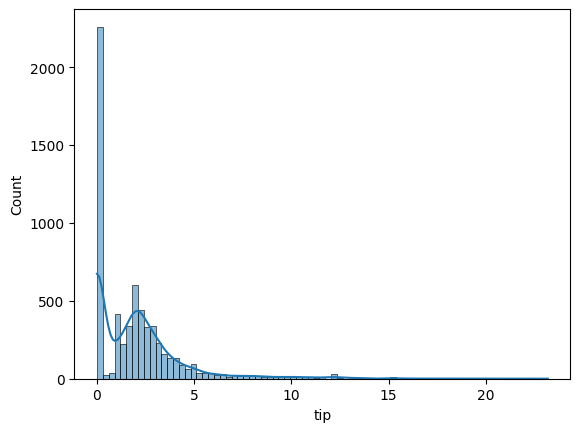

In [43]:
sns.histplot(x=df['tip'],kde=True)
plt.show()

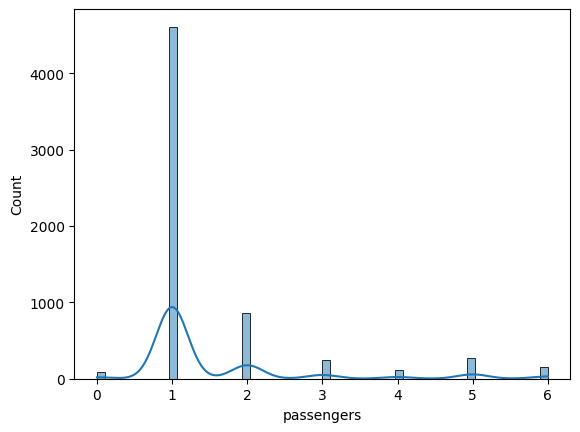

In [44]:
sns.histplot(x=df['passengers'],kde=True)
plt.show()

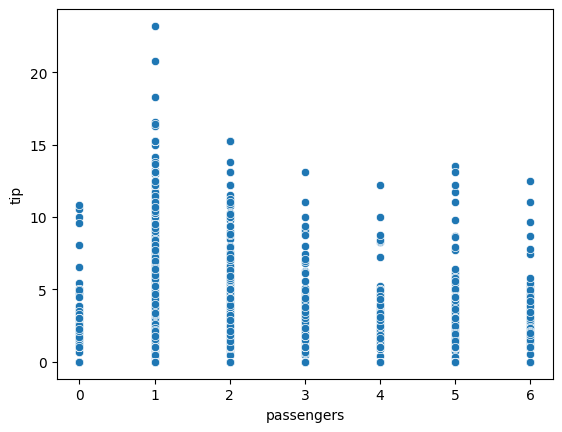

In [45]:
sns.scatterplot(x='passengers',y='tip',data=df)
plt.show()

In [46]:
r, p_val = stats.spearmanr(df['tip'],df['passengers'])
print("correlation", r)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and passengers")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and passengers")

correlation 0.027509812818779178
P-value: 0.028480753176042872
Reject null hypothesis: There is a significant correlation between tip and passengers


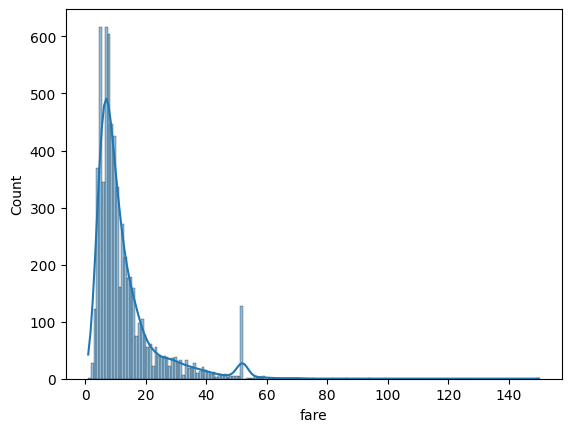

In [47]:
sns.histplot(x=df['fare'],kde=True)
plt.show()

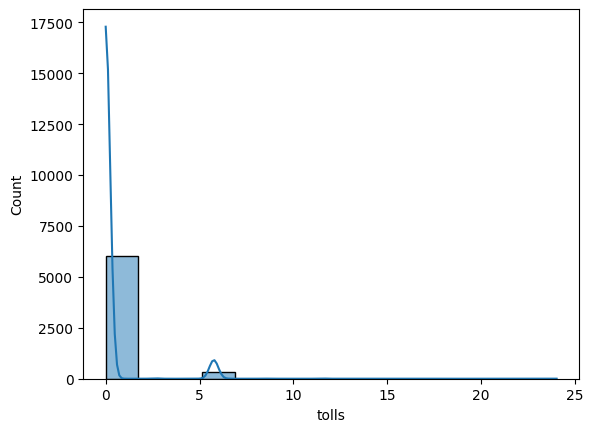

In [48]:
sns.histplot(x=df['tolls'],kde=True)
plt.show()

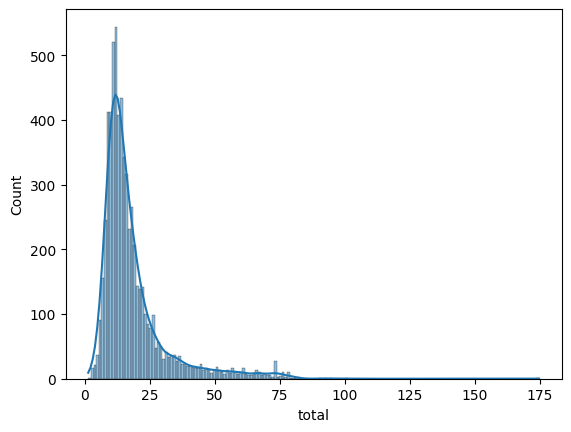

In [49]:
sns.histplot(x=df['total'],kde=True)
plt.show()

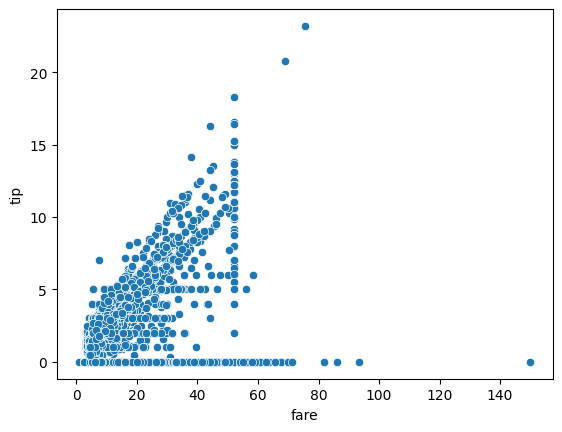

In [50]:
sns.scatterplot(x='fare',y='tip',data=df)
plt.show()

In [51]:
r, p_val = stats.spearmanr(df['tip'],df['fare'])
print("correlation", r)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and passengers")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and passengers")

correlation 0.310254279563729
P-value: 1.5556730728881364e-141
Reject null hypothesis: There is a significant correlation between tip and passengers


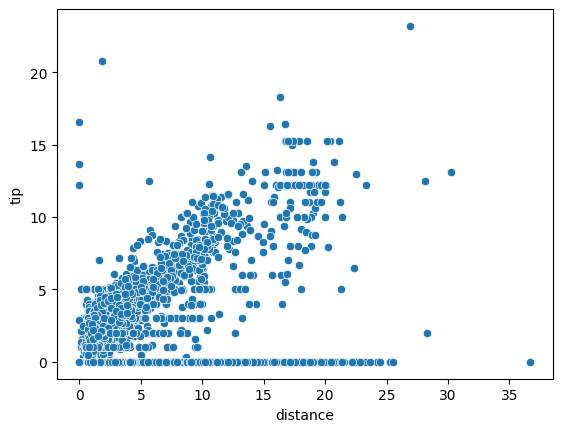

In [52]:
sns.scatterplot(x='distance',y='tip',data=df)
plt.show()

In [53]:
r, p_val = stats.spearmanr(df['tip'],df['distance'])
print("correlation", r)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and passengers")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and passengers")

correlation 0.29265085410043695
P-value: 1.9411181331374707e-125
Reject null hypothesis: There is a significant correlation between tip and passengers


In [54]:
r, p_val = stats.spearmanr(df['tip'],df['tolls'])
print("correlation", r)
print("P-value:", p_val)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and passengers")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and passengers")

correlation 0.175380002891528
P-value: 5.643276180955435e-45
Reject null hypothesis: There is a significant correlation between tip and passengers


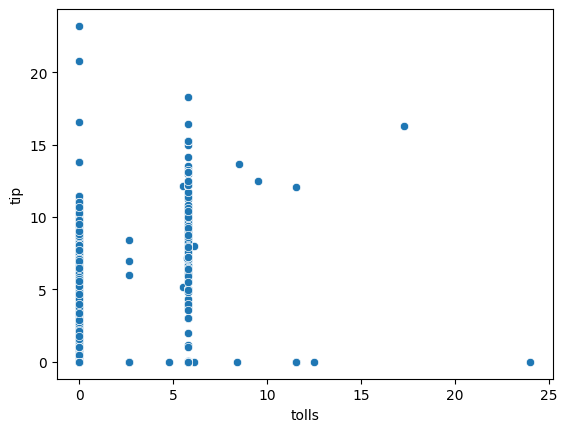

In [55]:
sns.scatterplot(x='tolls',y='tip',data=df)
plt.show()

In [56]:
nm=df[['passengers','fare','distance','tolls','tip']]

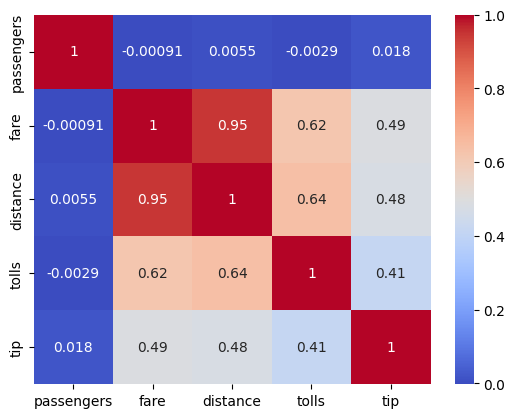

In [57]:
sns.heatmap(nm.corr(),annot=True,cmap='coolwarm')
plt.show()

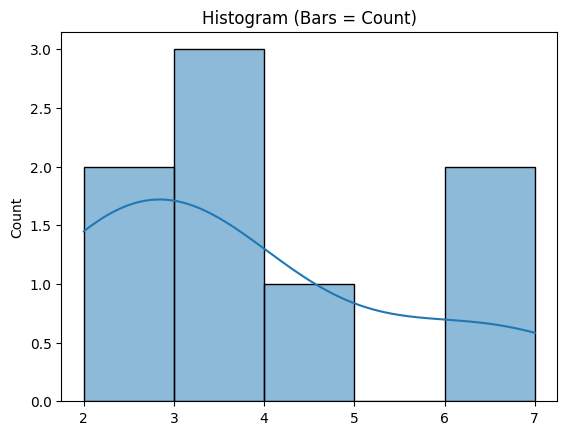

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simple data
data = np.array([2, 2, 3, 3, 3, 4, 6, 7])
sns.histplot(data, bins=5, kde=True)
plt.title("Histogram (Bars = Count)")
plt.show()


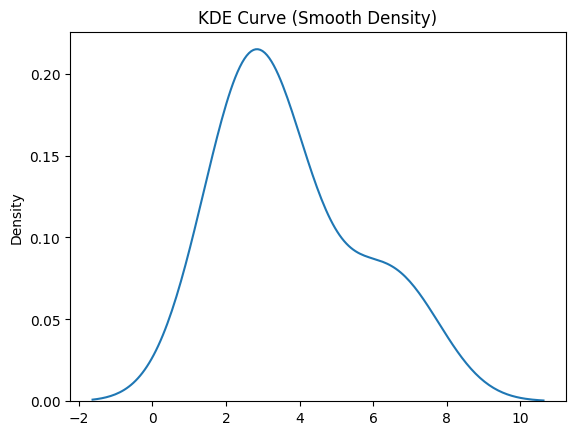

In [59]:
sns.kdeplot(data)
plt.title("KDE Curve (Smooth Density)")
plt.show()


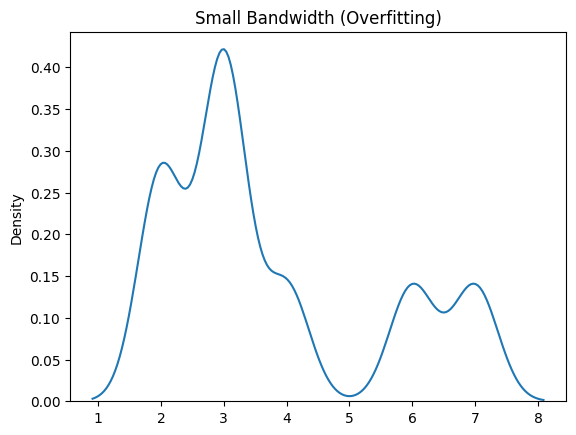

In [60]:
sns.kdeplot(data, bw_adjust=0.3)
plt.title("Small Bandwidth (Overfitting)")
plt.show()


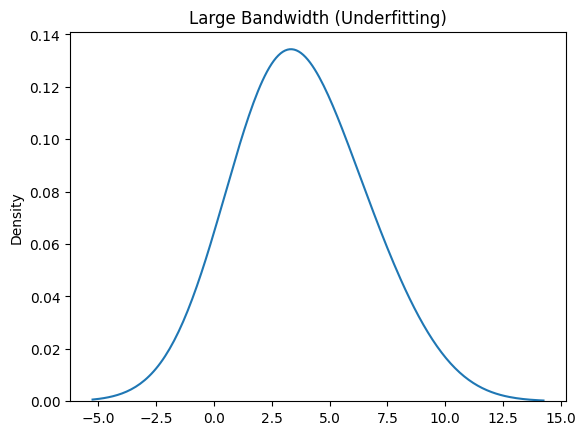

In [61]:
sns.kdeplot(data, bw_adjust=2)
plt.title("Large Bandwidth (Underfitting)")
plt.show()


In [62]:
df['pickup'].dt.month_name()

0       March
1       March
2       March
3       March
4       March
        ...  
6336    March
6337    March
6338    March
6339    March
6340    March
Name: pickup, Length: 6341, dtype: object

In [63]:
df['pickup'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
6336    2019
6337    2019
6338    2019
6339    2019
6340    2019
Name: pickup, Length: 6341, dtype: int32

In [64]:
df['pickup'].dt.day

0       23
1        4
2       27
3       10
4       30
        ..
6336    31
6337    31
6338    23
6339     4
6340    13
Name: pickup, Length: 6341, dtype: int32

In [65]:
df['pickup'].dt.day_name()

0        Saturday
1          Monday
2       Wednesday
3          Sunday
4        Saturday
          ...    
6336       Sunday
6337       Sunday
6338     Saturday
6339       Monday
6340    Wednesday
Name: pickup, Length: 6341, dtype: object

In [66]:
df['pickup'].dt.hour

0       20
1       16
2       17
3        1
4       13
        ..
6336     9
6337    17
6338    22
6339    10
6340    19
Name: pickup, Length: 6341, dtype: int32

In [67]:
df['pickup'].dt.weekday

0       5
1       0
2       2
3       6
4       5
       ..
6336    6
6337    6
6338    5
6339    0
6340    2
Name: pickup, Length: 6341, dtype: int32

In [68]:
df['pickup'].unique

<bound method Series.unique of 0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6336   2019-03-31 09:51:53
6337   2019-03-31 17:38:00
6338   2019-03-23 22:55:18
6339   2019-03-04 10:09:25
6340   2019-03-13 19:31:22
Name: pickup, Length: 6341, dtype: datetime64[ns]>

In [69]:
len(df['pickup'].unique())

6322

In [70]:
df['pickup_month']=df['pickup'].dt.month_name()

In [71]:
df['pickup_year']=df['pickup'].dt.year

In [72]:
df['pickup_day']=df['pickup'].dt.day

In [73]:
df['pickup_dayname']=df['pickup'].dt.day_name()

In [74]:
df['pickup_hour']=df['pickup'].dt.hour

In [75]:
df.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough pickup_month  \
0    UN/Turtle Bay South      Manhattan       Manhattan        March   
1  Upper West Side South      Manhattan       Manhattan        March   
2           West Village      Manhattan       Manhattan        March   
3         Yorkville West      Manhattan       Manhattan        March   
4         Yorkville West      Manhattan       Manhattan        March   

   pickup_year  pickup_day pickup_dayname  pickup_hour  
0         2019          23       Saturday           20  
1         2019           4         Monday           16  
2         2019          27      Wednesday           17  
3         2019          10         Sunday            1  
4         2019          30       Saturday           13

In [76]:
df.pickup_month.value_counts()

pickup_month
March       6340
February       1
Name: count, dtype: int64

In [77]:
df['dropoff_month']=df['dropoff'].dt.month_name()

In [78]:
df['dropoff_year']=df['dropoff'].dt.year

In [79]:
df['dropoff_day']=df['dropoff'].dt.day

In [80]:
df['dropoff_dayname']=df['dropoff'].dt.day_name()

In [81]:
df['dropoff_hour']=df['dropoff'].dt.hour

In [82]:
df.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment  ... pickup_month pickup_year pickup_day  \
0    0.0  12.95  yellow  credit card  ...        March        2019         23   
1    0.0   9.30  yellow         cash  ...        March        2019          4   
2    0.0  14.16  yellow  credit card  ...        March        2019         27   
3    0.0  36.95  yellow  credit card  ...        March        2019         10   
4    0.0  13.40  yellow  credit card  ...        March        2019         30   

  pickup_dayname pickup_hour  dropoff_month  dropoff_year dropoff_day  \
0       Saturday          20          March          2019          23   
1         Monday          16          March          2019           4   
2      Wednesday          17          March          2019          27   
3         Sunday           1          March          2019          10   
4       Saturday          13          March          2019          30   

   dropoff_dayname dropoff_hour  
0         Saturday           20  
1           Monday           16  
2        Wednesday           18  
3           Sunday            1  
4         Saturday           13  

[5 rows x 24 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
 14  pickup_month     6341 non-null   object 

In [84]:
from scipy import stats
march_tips = df[df['pickup_month']=='March']['tip']
febps = df[df['pickup_month']=='February']['tip']
t_stat, p_val = stats.ttest_ind(march_tips, febps)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: Tips differ by Month")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Month")
    

Independent T-Test statistic: 0.8352658713084974
P-value: 0.4035995080184128
Fail to reject null hypothesis: No significant tip difference by Month


In [85]:
df['dropoff_month'].unique()

array(['March', 'April', 'February'], dtype=object)

In [86]:
march_tips = df[df['dropoff_month']=='March']['tip']
febps = df[df['dropoff_month']=='February']['tip']
april_tips = df[df['dropoff_month']=='April']['tip']
f_stat, p_val = stats.f_oneway(march_tips, febps, april_tips)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: tip differs by Dropoff Month")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Dropoff Month")

ANOVA F-statistic: 0.6977458764114044
P-value: 0.4977441577891454
Fail to reject null hypothesis: No significant tip difference by Dropoff Month


In [87]:
df['pickup_dayname'].unique()

array(['Saturday', 'Monday', 'Wednesday', 'Sunday', 'Tuesday', 'Friday',
       'Thursday'], dtype=object)

In [88]:
tips=[group['tip'].values for name, group in df.groupby('pickup_dayname')]
f_stat, p_val = stats.f_oneway(*tips)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: tip differs by Pickup Dayname")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Pickup Dayname")

ANOVA F-statistic: 1.6689152148182256
P-value: 0.1242843162257308
Fail to reject null hypothesis: No significant tip difference by Pickup Dayname


In [89]:
tips=[group['tip'].values for name, group in df.groupby('dropoff_dayname')]
f_stat, p_val = stats.f_oneway(*tips)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject null hypothesis: tip differs by Dropoff Dayname")
else:
    print("Fail to reject null hypothesis: No significant tip difference by Dropoff Dayname")

ANOVA F-statistic: 1.6190096694735556
P-value: 0.13742247930087778
Fail to reject null hypothesis: No significant tip difference by Dropoff Dayname


In [90]:
print(df['pickup_day'].skew())
print(df['pickup_day'].kurtosis())

0.04994570013687315
-1.1765713733562717


In [91]:
r,p_val=stats.pearsonr(df['tip'],df['pickup_day'])
print("P-value:", p_val)
print("correlation", r)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and pickup day")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and pickup day")

P-value: nan
correlation 0.01768860767459803
Fail to reject null hypothesis: There is no significant correlation between tip and pickup day


In [92]:
print(df['dropoff_day'].skew())
print(df['dropoff_day'].kurtosis())

0.050247468887452844
-1.1763875279781784


In [93]:
r,p_val=stats.pearsonr(df['tip'],df['dropoff_day'])
print("P-value:", p_val)
print("correlation", r)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and dropoff day")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and dropoff day")

P-value: 0.14446317138849307
correlation 0.018328875576267726
Fail to reject null hypothesis: There is no significant correlation between tip and dropoff day


In [94]:
print(df['pickup_hour'].skew())
print(df['pickup_hour'].kurtosis())

-0.48079237828578225
-0.5336286870692848


In [95]:
r,p_val=stats.pearsonr(df['tip'],df['pickup_hour'])
print("P-value:", p_val)
print("correlation", r)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and pickup hour")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and pickup hour")

P-value: 0.034063158905884315
correlation 0.026615033651540543
Reject null hypothesis: There is a significant correlation between tip and pickup hour


In [96]:
print(df['dropoff_hour'].skew())
print(df['dropoff_hour'].kurtosis())

-0.5121914858347444
-0.5194809457514951


In [97]:
r,p_val=stats.spearmanr(df['tip'],df['dropoff_hour'])
print("P-value:", p_val)
print("correlation", r)
alpha=0.05
if p_val < alpha:
    print("Reject null hypothesis: There is a significant correlation between tip and dropoff hour")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between tip and dropoff hour")

P-value: 6.0707751854063095e-06
correlation 0.056776702660829036
Reject null hypothesis: There is a significant correlation between tip and dropoff hour


In [98]:
df.drop(columns=(['pickup_month','dropoff_month','pickup_dayname','dropoff_dayname','pickup_day','dropoff_day','pickup_year','dropoff_year']),inplace=True)

In [99]:
df.head()

pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  pickup_hour  \
0    UN/Turtle Bay South      Manhattan       Manhattan           20   
1  Upper West Side South      Manhattan       Manhattan           16   
2           West Village      Manhattan       Manhattan           17   
3         Yorkville West      Manhattan       Manhattan            1   
4         Yorkville West      Manhattan       Manhattan           13   

   dropoff_hour  
0            20  
1            16  
2            18  
3             1  
4            13

In [100]:
df.drop(columns=['pickup','dropoff'],inplace=True)

In [101]:
df.head()

passengers  distance  fare   tip  tolls  total   color      payment  \
0           1      1.60   7.0  2.15    0.0  12.95  yellow  credit card   
1           1      0.79   5.0  0.00    0.0   9.30  yellow         cash   
2           1      1.37   7.5  2.36    0.0  14.16  yellow  credit card   
3           1      7.70  27.0  6.15    0.0  36.95  yellow  credit card   
4           3      2.16   9.0  1.10    0.0  13.40  yellow  credit card   

             pickup_zone           dropoff_zone pickup_borough  \
0        Lenox Hill West    UN/Turtle Bay South      Manhattan   
1  Upper West Side South  Upper West Side South      Manhattan   
2          Alphabet City           West Village      Manhattan   
3              Hudson Sq         Yorkville West      Manhattan   
4           Midtown East         Yorkville West      Manhattan   

  dropoff_borough  pickup_hour  dropoff_hour  
0       Manhattan           20            20  
1       Manhattan           16            16  
2       Manhattan           17            18  
3       Manhattan            1             1  
4       Manhattan           13            13

In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat=['color','payment','pickup_borough','dropoff_borough','pickup_zone','dropoff_zone']
for i in cat:
    df[i]=le.fit_transform(df[i])


In [103]:
df.head()

passengers  distance  fare   tip  tolls  total  color  payment  \
0           1      1.60   7.0  2.15    0.0  12.95      1        1   
1           1      0.79   5.0  0.00    0.0   9.30      1        0   
2           1      1.37   7.5  2.36    0.0  14.16      1        1   
3           1      7.70  27.0  6.15    0.0  36.95      1        1   
4           3      2.16   9.0  1.10    0.0  13.40      1        1   

   pickup_zone  dropoff_zone  pickup_borough  dropoff_borough  pickup_hour  \
0           99           176               2                2           20   
1          174           182               2                2           16   
2            1           190               2                2           17   
3           86           202               2                2            1   
4          116           202               2                2           13   

   dropoff_hour  
0            20  
1            16  
2            18  
3             1  
4            13

In [104]:
cont=['fare','distance','tolls','total']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[cont]=scaler.fit_transform(df[cont])

In [105]:
df.head()

passengers  distance      fare   tip     tolls     total  color  payment  \
0           1 -0.375780 -0.549175  2.15 -0.229932 -0.413941      1        1   
1           1 -0.593552 -0.735718  0.00 -0.229932 -0.695808      1        0   
2           1 -0.437617 -0.502540  2.36 -0.229932 -0.320500      1        1   
3           1  1.264233  1.316252  6.15 -0.229932  1.439435      1        1   
4           3 -0.225221 -0.362633  1.10 -0.229932 -0.379190      1        1   

   pickup_zone  dropoff_zone  pickup_borough  dropoff_borough  pickup_hour  \
0           99           176               2                2           20   
1          174           182               2                2           16   
2            1           190               2                2           17   
3           86           202               2                2            1   
4          116           202               2                2           13   

   dropoff_hour  
0            20  
1            16  
2            18  
3             1  
4            13

In [106]:
x=df.drop(columns=['tip'])
y=df['tip']

In [107]:
print(x.shape)
print(y.shape)

(6341, 13)
(6341,)


In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [109]:
print("x_train shape : ",X_train.shape)
print("x_test shape : ",X_test.shape)
print("y_train shape : ",y_train.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (5072, 13)
x_test shape :  (1269, 13)
y_train shape :  (5072,)
y_test shape :  (1269,)


In [110]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [111]:
lr.coef_

array([-1.01470588e-02,  1.18894479e-01, -7.85454716e+00, -9.58811355e-01,
        9.67075027e+00, -1.19644549e+00,  5.57447192e-01, -8.35931865e-04,
       -1.54392972e-03,  2.18744350e-01, -7.94176600e-02, -1.59326298e-02,
       -1.64957998e-03])

In [112]:
lr.intercept_

np.float64(2.8290371085875337)

# Training Score

In [113]:
y_train_pred=lr.predict(X_train)
train_score=lr.score(X_train,y_train)
print("Model Train  Score:", train_score)

Model Train  Score: 0.9240742425138988


In [114]:
y_test_pred=lr.predict(X_test)
test_score=lr.score(X_test,y_test)
print("Model Test  Score:", test_score)

Model Test  Score: 0.9252191387301993


In [117]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_train, y_train_pred)
print("R-squared:", r2)



Mean Absolute Error: 0.43862941981060766
Mean Squared Error: 0.42927306728710896
Root Mean Squared Error: 0.6551893369760446
R-squared: 0.9240742425138988


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_test_pred)
print("R-squared:", r2)



Mean Absolute Error: 0.4206158611342281
Mean Squared Error: 0.39431943854899354
Root Mean Squared Error: 0.6279485954670123
R-squared: 0.9252191387301993
